In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.autograd import Variable

Downloading http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz

Downloading http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz

Downloading http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz

Downloading http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz

In [2]:
# MNIST Dataset
train_dataset = datasets.MNIST(root='../data/',
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=False) # change it to True when you firstly download the data

test_dataset = datasets.MNIST(root='../data/',
                           train=False, 
                           transform=transforms.ToTensor())

In [5]:
# Hyper Parameters
batch_size = 100
learning_rate = 0.001
num_epochs = 5

In [6]:
# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

    4     2     1     8     9


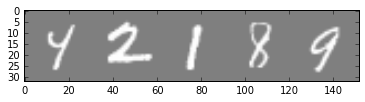

In [22]:
import numpy as np
import torchvision

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images[:5]))
# print labels
print(' '.join('%5s' % labels[j] for j in range(5)))

In [7]:
# CNN Model (2 conv layer)
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.fc = nn.Linear(7*7*32, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out
        
cnn = CNN()

In [8]:
# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr=learning_rate)


In [9]:
# Train the Model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images)
        labels = Variable(labels)
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = cnn(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [%d/%d], Iter [%d/%d] Loss: %.4f' 
                   %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))


Epoch [1/5], Iter [100/600] Loss: 0.1637
Epoch [1/5], Iter [200/600] Loss: 0.0515
Epoch [1/5], Iter [300/600] Loss: 0.0795
Epoch [1/5], Iter [400/600] Loss: 0.1069
Epoch [1/5], Iter [500/600] Loss: 0.0765
Epoch [1/5], Iter [600/600] Loss: 0.0471
Epoch [2/5], Iter [100/600] Loss: 0.1318
Epoch [2/5], Iter [200/600] Loss: 0.0747
Epoch [2/5], Iter [300/600] Loss: 0.0151
Epoch [2/5], Iter [400/600] Loss: 0.0669
Epoch [2/5], Iter [500/600] Loss: 0.1070
Epoch [2/5], Iter [600/600] Loss: 0.0130
Epoch [3/5], Iter [100/600] Loss: 0.0300
Epoch [3/5], Iter [200/600] Loss: 0.0247
Epoch [3/5], Iter [300/600] Loss: 0.0513
Epoch [3/5], Iter [400/600] Loss: 0.0316
Epoch [3/5], Iter [500/600] Loss: 0.0249
Epoch [3/5], Iter [600/600] Loss: 0.0053
Epoch [4/5], Iter [100/600] Loss: 0.0763
Epoch [4/5], Iter [200/600] Loss: 0.0601
Epoch [4/5], Iter [300/600] Loss: 0.0224
Epoch [4/5], Iter [400/600] Loss: 0.0359
Epoch [4/5], Iter [500/600] Loss: 0.0131
Epoch [4/5], Iter [600/600] Loss: 0.0113
Epoch [5/5], Ite

In [10]:
# Test the Model
cnn.eval()  # Change model to 'eval' mode (BN uses moving mean/var).
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images)
    outputs = cnn(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Test Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total))


Test Accuracy of the model on the 10000 test images: 99 %


In [ ]:
# Save the Trained Model
torch.save(cnn.state_dict(), 'cnn.pkl')